# Simple Linear Regresion

## Relevant imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### load dataset

In [3]:
penguins = sns.load_dataset("penguins")

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

## data cleaning

For the purposes of this course, we are focusing our analysis on Adelie and Gentoo penguins, and will be dropping any missing values from the dataset. In a work setting, you would typically examine the data more thoroughly before deciding how to handle missing data (i.e., fill in, drop, etc.)

In [7]:
data = penguins[penguins['species'] != 'Chinstrap']
data = data.dropna()

In [8]:
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
data.duplicated().sum()

0

## Exploratory data analysis

Before you construct any model, it is important to get more familiar with your data. You can do so by performing exploratory data analysis or EDA. Please review previous program materials as needed if you would like to refamiliarize yourself with EDA concepts

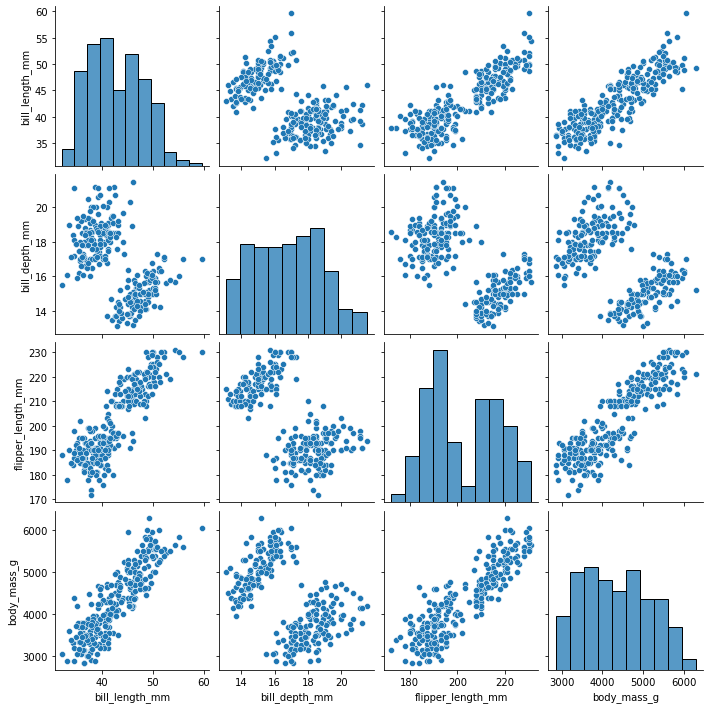

In [13]:
# Create pairwise scatterplots of data set
sns.pairplot(data)

# Model construction

Based on the above scatterplots, you could probably run a simple linear regression on any of the three relationships identified. For this part of the course, you will focus on the relationship between bill length (mm) and body mass (g).

In [14]:
# Subset Data
ols_data = data[["bill_length_mm", "body_mass_g"]]

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the ~, and the x or independent variables comes after the ~.

Note: The names of the x and y variables have to exactly match the column names in the dataframe.

In [15]:
ols_formula = "body_mass_g ~ bill_length_mm"

In [16]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

Lastly, you can call the summary() function on the model object to get the coefficients and more statistics about the model. The output from model.summary() can be used to evaluate the model and interpret the results. Later in this section, we will go over how to read the results of the model output.

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.33e-85
Time:                        20:10:45   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### let's build the regression line

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

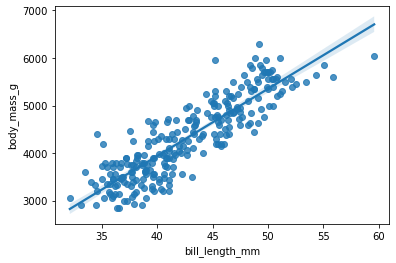

In [18]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, you can only check these assumptions after you have constructed the model. To check these assumptions, you will check the residuals, as an approximation of the errors.

To more easily check the model assumptions and create relevant visualizations, you can first subset the X variable by isolating just the `bill_length_mm` column. Additionally, you can save the predicted values from the model using the `model.predict(X)` function.

In [19]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

In [20]:
# Calculate residuals
residuals = model.resid

### Check the normality assumption

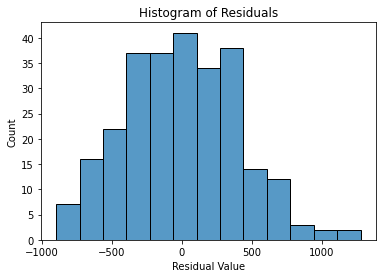

In [21]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using the qqplot function from the statsmodels.api package.

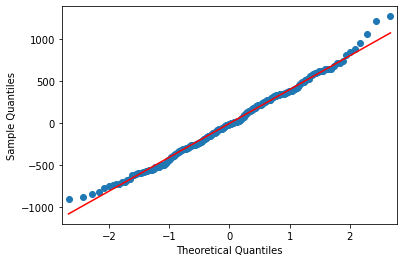

In [22]:
fig = sm.qqplot(model.resid, line = 's')
plt.show()

### Check the homoscedasticity assumption

Lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, you can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

You can create one scatterplot by using the scatterplot() function from the seaborn package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis

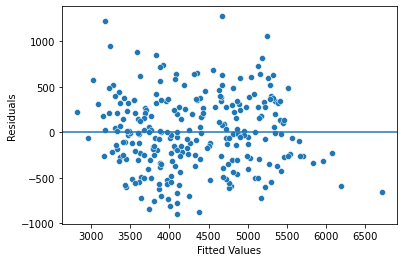

In [23]:
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

# Multiple Linear Regression

## Introduction

For this activity, We will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business request, we will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

Exploring and cleaning data
Using plots and descriptive statistics to select the independent variables
Creating a fitting multiple linear regression model
Checking model assumptions
Interpreting model outputs and communicating the results to non-technical stakeholders

### load data

In [29]:
df = pd.read_csv('marketing_sales_data.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## data exploration

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Nano," and "Micro" categories)

In [30]:
#check for mising data
df.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [32]:
df.duplicated().sum()

0

In [33]:
df.describe()

,Radio,Social Media,Sales
count,572.000000,572.000000,572.000000
mean,17.520616,3.333803,189.296908
std,9.290933,2.238378,89.871581
min,0.109106,0.000031,33.509810
25%,10.699556,1.585549,118.718722
50%,17.149517,3.150111,184.005362
75%,24.606396,4.730408,264.500118
max,42.271579,11.403625,357.788195


## Create a pairplot of the data

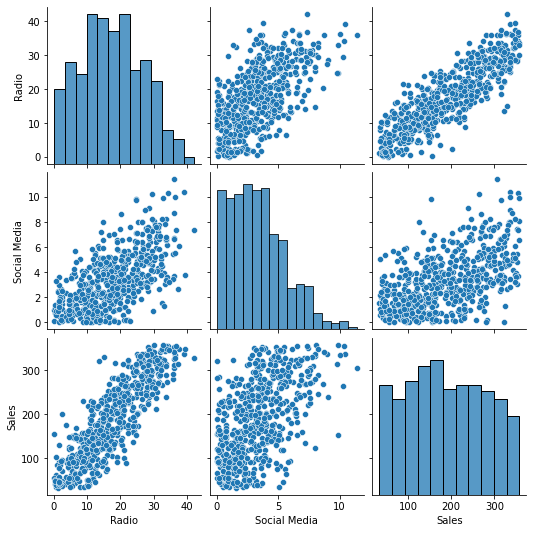

In [34]:
sns.pairplot(df);

### Calculate the mean sales for each categorical variable

In [35]:

print(df.groupby('TV')['Sales'].mean())

print('')

# Calculate the mean sales for each Influencer category .

### YOUR CODE HERE ### 

print(df.groupby('Influencer')['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64



The ols() function doesn't run when variable names contain a space. Check that the column names in data do not contain spaces and fix them, if needed.

In [36]:
df = df.rename(columns={'Social Media': 'Social_Media'})

## model building

### Fit a multiple linear regression model that predicts sales

In [37]:
ols_formula = 'Sales ~ C(TV) + Radio'

# Create an OLS model. 

OLS = ols(formula = ols_formula, data = df)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          1.63e-288
Time:                        20:37:49   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model assumption: Linearity

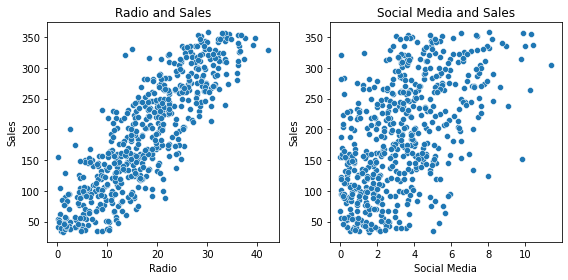

In [38]:
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = df['Radio'], y = df['Sales'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Radio and Sales")

# Create a scatterplot between Social Media and Sales.
sns.scatterplot(x = df['Social_Media'], y = df['Sales'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Social Media and Sales")

# Set the xlabel of the second plot.
axes[1].set_xlabel("Social Media")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

Question: Is the linearity assumption met?

The linearity assumption holds for Radio, as there is a clear linear relationship in the scatterplot between Radio and Sales. Social Media was not included in the preceding multiple linear regression model, but it does appear to have a linear relationship with Sales.

## Model assumption: Independence

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

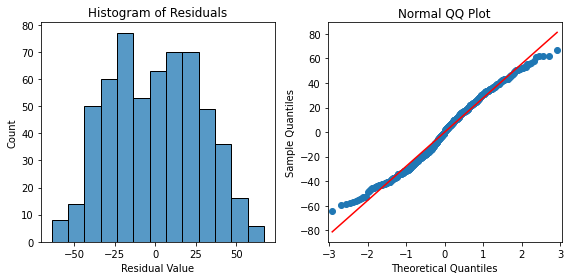

In [39]:
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

Question: Is the normality assumption met?

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

## Model assumption: Constant variance

Check that the constant variance assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at  𝑦=0
  to visualize the variance of residuals above and below  𝑦=0
 .

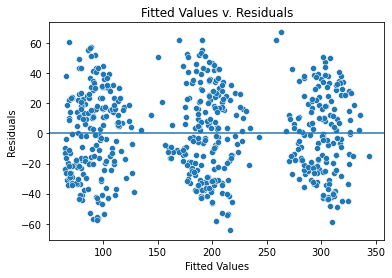

In [40]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot.
plt.show()

Question 7: Is the constant variance assumption met?

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met

## Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption

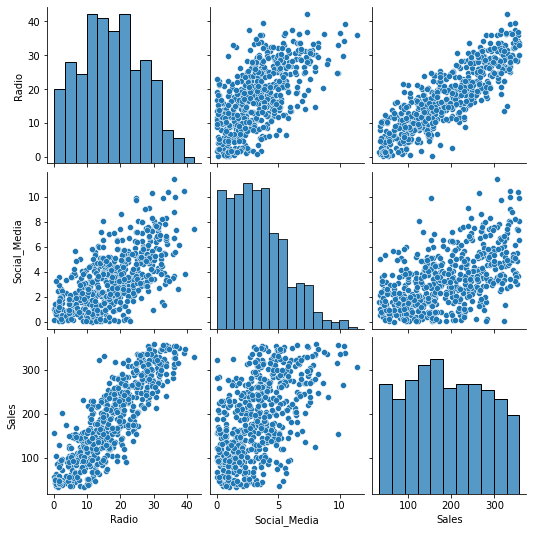

In [42]:
sns.pairplot(df)

In [43]:
# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = df[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,5.170922
Social_Media,5.170922


Question 8: Is the no multicollinearity assumption met?

The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.

If a model used both Radio and Social_Media as predictors, there would be a moderate linear relationship between Radio and Social_Media that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both Radio and Social_Media are included in the model is 5.17 for each variable, indicating high multicollinearity

In [1]:
import seaborn as sns

all_datasets = sns.get_dataset_names()
print(all_datasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
data = sns.load_dataset('taxis')

In [3]:
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
